                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


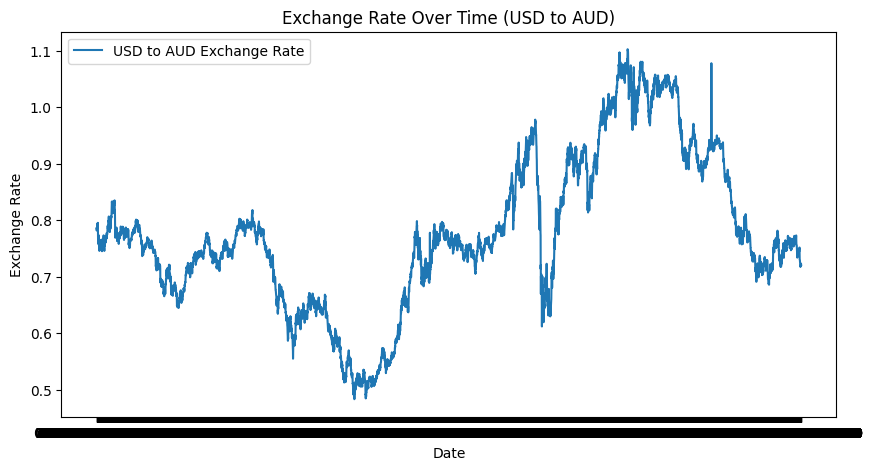

Ex_rate    0
dtype: int64


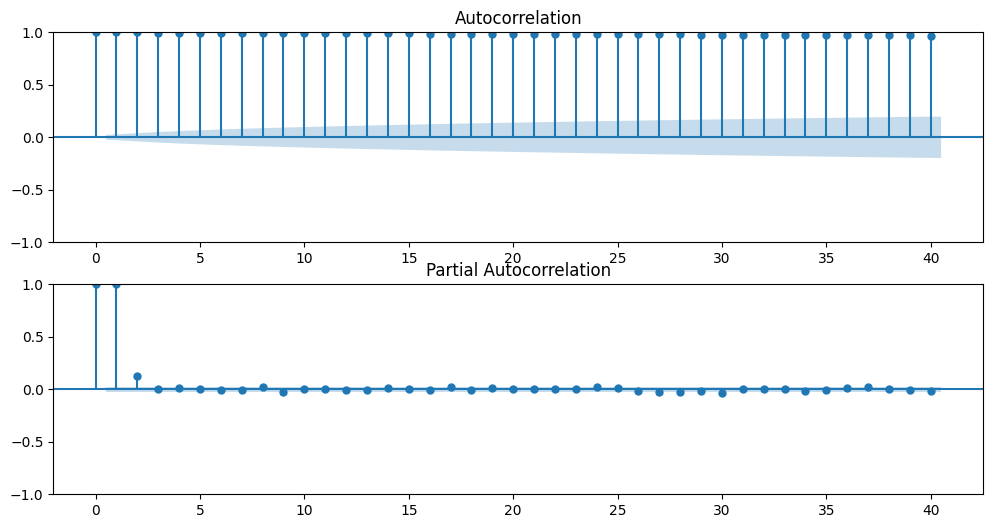

C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 01 Sep 2024   AIC                         -56102.322
Time:                        13:19:57   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


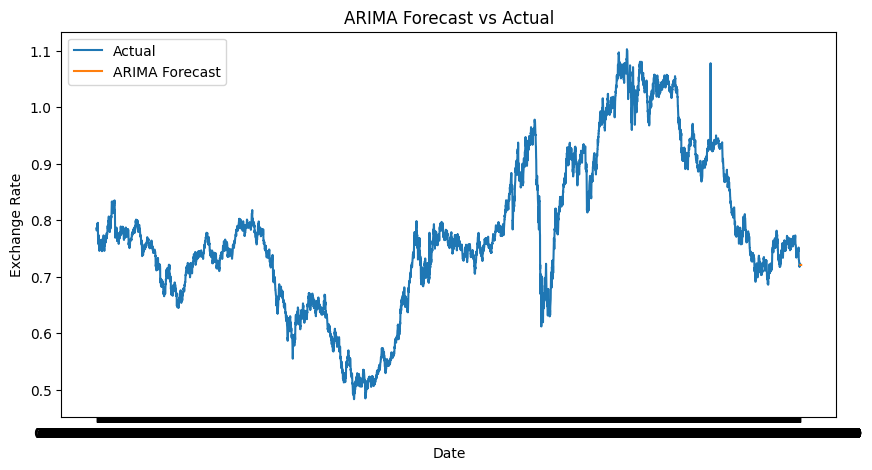

C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


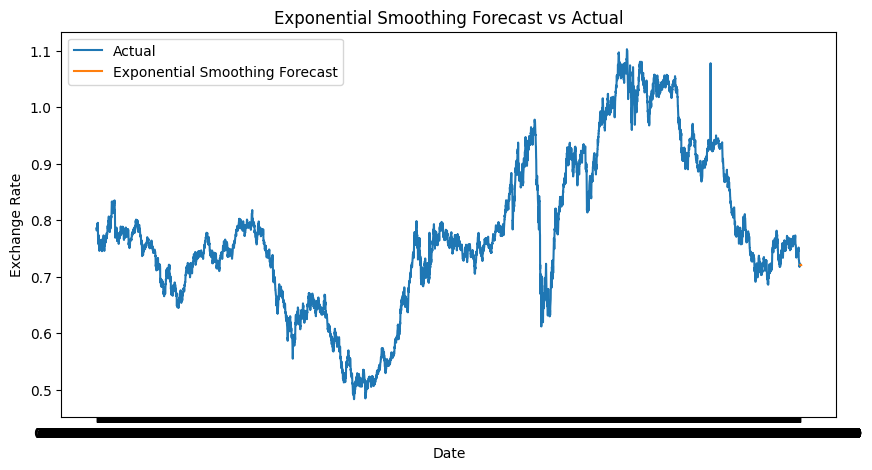

ARIMA Model - MAE: 0.001556771200434226, RMSE: 0.0018425706107113402
Exponential Smoothing Model - MAE: 0.0015082636566562057, RMSE: 0.0017842353526768683
Exponential Smoothing model performs better.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
data = pd.read_csv(r"D:\DS\Timeseries\exchange_rate.csv", parse_dates=['date'], index_col='date')

# Display the first few rows of the dataset
print(data.head())

# Initial Exploration - Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(data['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Over Time (USD to AUD)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Check for missing values
print(data.isnull().sum())

# Fill or interpolate missing values
data = data.interpolate()

# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.show()

# Building ARIMA model
# Based on the ACF and PACF plots, choose initial values for p, d, q
p, d, q = 1, 1, 1  # Example values, modify based on ACF/PACF plots

# Fit ARIMA model
arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecast using ARIMA
forecast_arima = arima_result.forecast(steps=10)
plt.figure(figsize=(10, 5))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Building Exponential Smoothing model
exp_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)
exp_result = exp_model.fit()

# Forecast using Exponential Smoothing
forecast_exp = exp_result.forecast(steps=10)
plt.figure(figsize=(10, 5))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(forecast_exp, label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Evaluate the models
mae_arima = mean_absolute_error(data['Ex_rate'][-10:], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(data['Ex_rate'][-10:], forecast_arima))

mae_exp = mean_absolute_error(data['Ex_rate'][-10:], forecast_exp)
rmse_exp = np.sqrt(mean_squared_error(data['Ex_rate'][-10:], forecast_exp))

print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Exponential Smoothing Model - MAE: {mae_exp}, RMSE: {rmse_exp}')

# Compare and conclude
if mae_arima < mae_exp and rmse_arima < rmse_exp:
    print("ARIMA model performs better.")
else:
    print("Exponential Smoothing model performs better.")


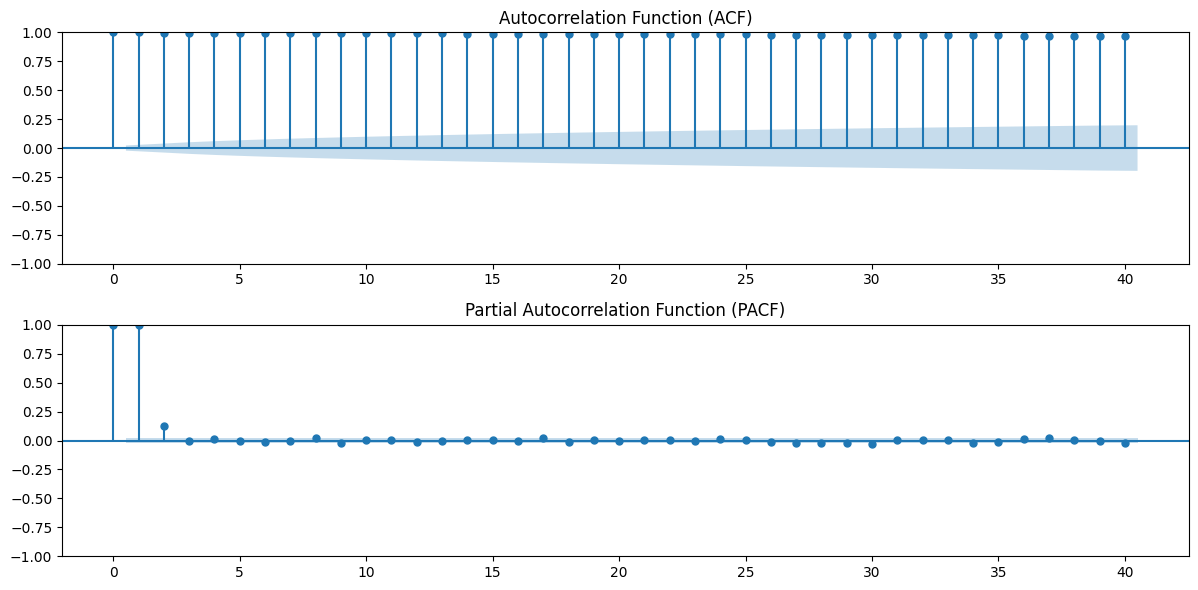

In [5]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(211)
plot_acf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(212)
plot_pacf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 01 Sep 2024   AIC                         -56102.322
Time:                        13:33:41   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


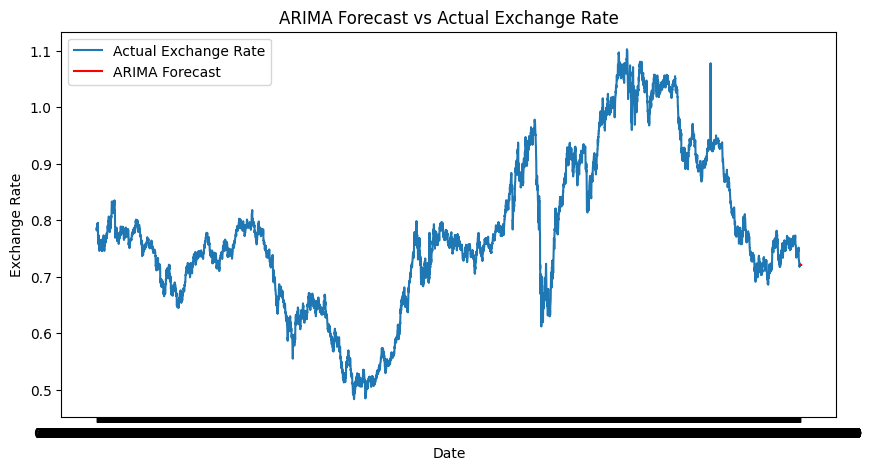

In [6]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
p, d, q = 1, 1, 1  # Update these values based on your analysis of ACF and PACF
arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

# Print ARIMA model summary
print(arima_result.summary())

# Forecast using the ARIMA model
forecast_arima = arima_result.forecast(steps=10)
plt.figure(figsize=(10, 5))
plt.plot(data['Ex_rate'], label='Actual Exchange Rate')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


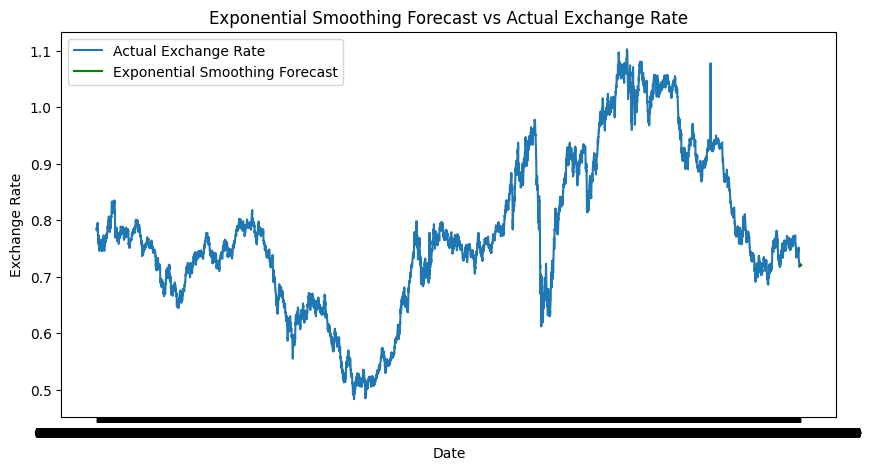

In [7]:
# Import the Exponential Smoothing model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
exp_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
exp_result = exp_model.fit()

# Forecast using Exponential Smoothing model
forecast_exp = exp_result.forecast(steps=10)

plt.figure(figsize=(10, 5))
plt.plot(data['Ex_rate'], label='Actual Exchange Rate')
plt.plot(forecast_exp, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast vs Actual Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()
